In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import datetime
import gensim

In [15]:
df = pd.read_csv("../results/fine-scale/lda-models/testing-subsets/fitting_time_topics.csv")
df_training = pd.read_csv("../results/fine-scale/lda-models/training-model/fitting_time_lda.csv")

df['percentage_corpus'] = df['percentage_corpus'].apply(lambda x: int(x*100))
df.head()

,n_topics,percentage_corpus,fitting_time
0,50,1,0 days 00:00:34.770199
1,100,1,0 days 00:00:51.080717
2,150,1,0 days 00:00:39.406861
3,200,1,0 days 00:00:42.659622
4,250,1,0 days 00:00:49.875112


In [16]:
df['fitting_time'] = pd.to_timedelta(df['fitting_time'])

df['fitting_time'] = df['fitting_time'].map(lambda x: (x.total_seconds()))


<AxesSubplot:xlabel='n_topics', ylabel='fitting_time'>

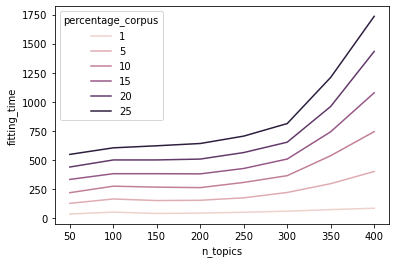

In [17]:
sn.lineplot(data=df, x="n_topics", y="fitting_time", hue="percentage_corpus")

<AxesSubplot:xlabel='percentage_corpus', ylabel='fitting_time'>

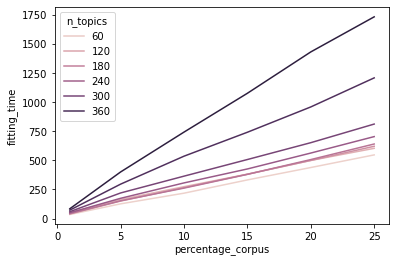

In [18]:
sn.lineplot(data=df, x="percentage_corpus", y="fitting_time", hue="n_topics")

In [20]:
df_training['fitting_time'] = pd.to_timedelta(df_training['fitting_time'])

df_training['fitting_time'] = df_training['fitting_time'].map(lambda x: (x.total_seconds()))


<AxesSubplot:xlabel='n_topics', ylabel='fitting_time'>

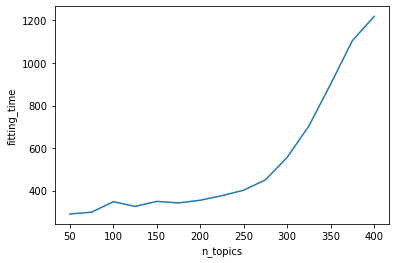

In [21]:
sn.lineplot(data=df_training, x="n_topics", y="fitting_time")

In [28]:
import gensim.corpora as corpora
from gensim.models import LdaMulticore
from gensim.models import TfidfModel
from gensim.models import CoherenceModel

from collections import Counter



In [32]:
#names
topics_range = [50, 100, 150, 200, 250, 300, 350, 400]
proportion_corpus = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25]

In [37]:
rep_topics = []

for p in proportion_corpus:
    for K in topics_range:

        file = "../results/fine-scale/lda-models/testing-subsets/perc_" + str(p) + "_model_" + str(K) + "_topics"
        lda = gensim.models.ldamulticore.LdaMulticore.load(file)

        K = lda.num_topics
        w_ids = []
        for t in range(K):
            x = lda.get_topic_terms(t)
            w_ids.append([j[0] for j in x])
            w_ids[t].sort()
            w_ids[t] = "".join([str(w) for w in w_ids[t]])

        rep_topics.append(max(Counter(w_ids).values()))

<AxesSubplot:xlabel='n_topics', ylabel='prop_rep'>

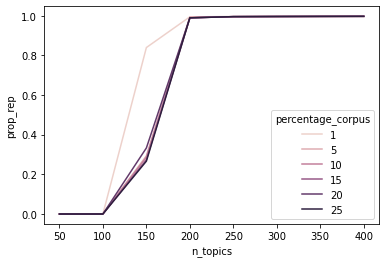

In [58]:
df["rep_topics"] = [x for x in map(lambda x: x-1, rep_topics)]
df["prop_rep"] = df["rep_topics"] / df["n_topics"] 

sn.lineplot(data=df, x="n_topics", y="prop_rep", hue="percentage_corpus")

<AxesSubplot:xlabel='percentage_corpus', ylabel='prop_rep'>

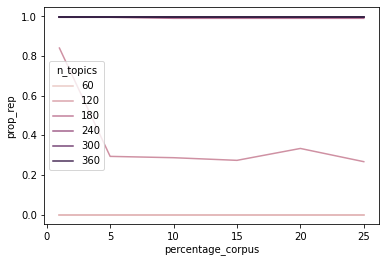

In [60]:
sn.lineplot(data=df, x="percentage_corpus", y="prop_rep", hue="n_topics")

In [152]:
topic_words = [[j[0] for j in lda.show_topic(i,topn = 10)] for i in range(lda.num_topics)]

topic_df = pd.DataFrame(topic_words)

print(topic_df.to_string())


                  0                  1                  2                  3                      4                    5                       6                7                8                  9
0   instrumentation         proteomics  mass_spectrometry           analysis                   core           instrument          flow_cytometry        cytometry         facility            sorting
1            muscle              heart             injury           ischemia          heart_failure                 cell                   brain           stress      dysfunction          mechanism
2              gene           mutation         chromosome            linkage                 family                locus                   mouse           region          disease          phenotype
3           patient              trial          treatment                hiv                 stroke              outcome            intervention             care          therapy               risk
4         

In [129]:
max(Counter(w_ids).values())

41

In [137]:
lda.get_topic_terms(3)

[(3640, 0.00018304962),
 (3638, 0.00018304962),
 (3647, 0.00018304962),
 (3646, 0.00018304962),
 (3645, 0.00018304962),
 (3644, 0.00018304962),
 (3643, 0.00018304962),
 (3642, 0.00018304962),
 (3641, 0.00018304962),
 (3649, 0.00018304962)]